## Preambule

In [1]:
import numpy as np
from tqdm import tqdm
from importlib import reload
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import scipy
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Run classes

Data reader class

In [116]:
import class_datareading
reload(class_datareading)
from class_datareading import datareading

datareader = datareading()
datareader.read_general()
datareader.read_ssps()
datareader.read_undata()
datareader.read_hdi()
datareader.read_historicalemis_jones()
datareader.read_ar6()
datareader.relation_budget_nonco2()
datareader.determine_global_nonco2_trajectories()
datareader.determine_global_budgets()
datareader.determine_global_co2_trajectories()
datareader.read_baseline()
datareader.read_ndc()
datareader.read_ndc_climateresource()
datareader.merge_xr()
datareader.add_country_groups()
datareader.save()
datareader.country_specific_datareaders()

# ==================================== #
# DATAREADING class                    #
# startyear:  2015
# ==================================== #
- Reading general data
- Reading GDP and population data from SSPs
- Reading UN population data and gapminder, processed by OWID (for past population)
- Read Human Development Index data
- Reading historical emissions (jones)
- Read AR6 data
- Get relationship between CO2 budgets and non-co2 reduction in 2050
- Computing global nonco2 trajectories
- Get global CO2 budgets
- Computing global co2 trajectories
- Reading baseline emissions
- Reading NDC data
- Reading NDC data from Climate resource
- Merging xrarray object
- Add country groups
- Save important files


Text(0.5, 1.0, 'GHG excluding LULUCF')

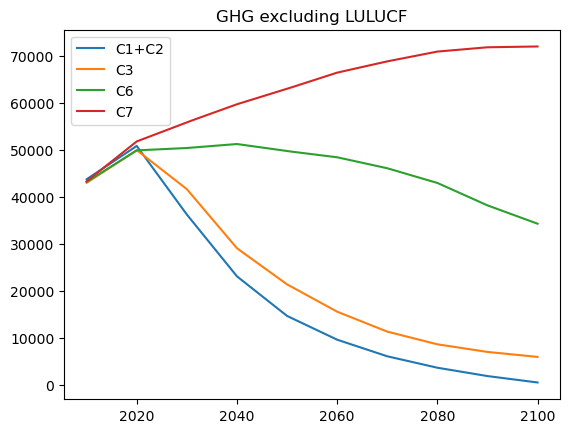

In [80]:
for c in np.array(datareader.xr_total.Category):
    plt.plot(datareader.xr_total.Time, datareader.xr_total.GHG_excl_C.sel(Category=c), label=c)
plt.legend()
plt.title('GHG excluding LULUCF')

Text(0.5, 1.0, 'CO2 negative emissions (CCS + DAC)')

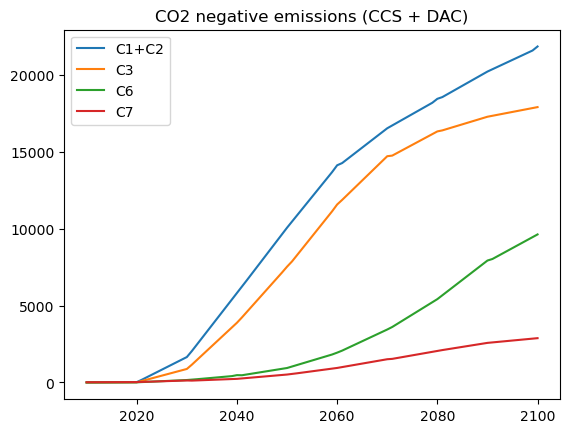

In [81]:
for c in np.array(datareader.xr_total.Category):
    plt.plot(datareader.xr_total.Time, datareader.xr_total.CO2_neg_C.sel(Category=c), label=c)
plt.legend()
plt.title('CO2 negative emissions (CCS + DAC)')

In [63]:
import class_allocation
reload(class_allocation)
from class_allocation import allocation

allocator = allocation("USA", lulucf='incl', gas='GHG')
allocator.gf()
allocator.pc()
allocator.pcc()
allocator.pcb()
allocator.ecpc()
allocator.ap()
allocator.gdr()
allocator.save()

Allocations specifically for Norway and Netherlands if you want to harmonize to national data

In [4]:
import class_allocation
reload(class_allocation)
from class_allocation import allocation

for lulucf in ['incl', 'excl']:
    for gas in ['GHG', 'CO2']:
        for dataread_file in ['xr_dataread.nc', 'xr_dataread_nor.nc']: # This is only necessary if for a country a specific historical emissions profile is required beyond what is in Jones (e.g. Norway was requested)
            allocator = allocation('NOR', lulucf=lulucf, gas=gas, dataread_file=dataread_file)
            allocator.gf()
            allocator.pc()
            allocator.pcc()
            allocator.pcb()
            allocator.ecpc()
            allocator.ap()
            allocator.gdr()
            allocator.save()
            print('NOR', lulucf, gas, dataread_file, 'done')

NOR incl GHG xr_dataread.nc done
NOR incl GHG xr_dataread_nor.nc done
NOR incl CO2 xr_dataread.nc done
NOR incl CO2 xr_dataread_nor.nc done
NOR excl GHG xr_dataread.nc done
NOR excl GHG xr_dataread_nor.nc done
NOR excl CO2 xr_dataread.nc done
NOR excl CO2 xr_dataread_nor.nc done


Allocation class (run all 207 countries)

In [ ]:
import class_allocation
reload(class_allocation)
from class_allocation import allocation

regions_iso = np.load("K:/Data/Data_effortsharing/DataUpdate_ongoing/all_regions.npy", allow_pickle=True)
for cty in tqdm(regions_iso):
    allocator = allocation(cty, lulucf='incl', gas='GHG')
    allocator.gf()
    allocator.pc()
    allocator.pcc()
    allocator.pcb()
    allocator.ecpc()
    allocator.ap()
    allocator.gdr()
    allocator.save()

Allocation rules combining approaches (Robiou paper)

In [ ]:
import class_allocation_combinedapproaches
reload(class_allocation_combinedapproaches)
from class_allocation_combinedapproaches import allocation_comb

allocator = allocation_comb()
allocator.ecpc()
allocator.pc()
allocator.discounting_historical_emissions()
allocator.approach1gdp()
allocator.approach1hdi()
allocator.approach2()
allocator.approach2_transition()
allocator.combine()
allocator.get_relation_2030emis_temp()
allocator.determine_tempoutcomes_discrete()
allocator.save()

In [4]:
self = allocator

(2000.0, 2100.0)

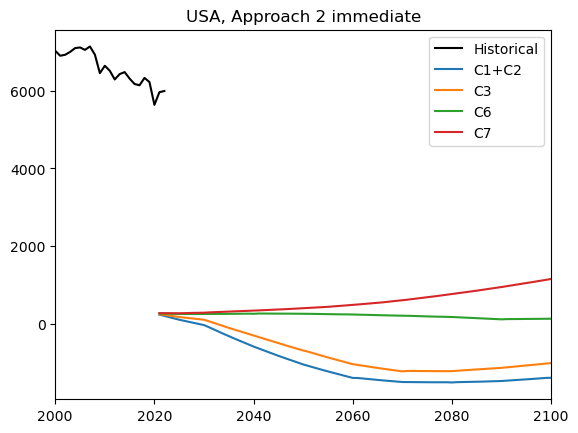

In [115]:
plt.plot(allocator.xr_dataread.Time,
         allocator.xr_dataread.GHG_hist_excl.sel(Region='USA'), c='black', label='Historical')
for c in np.array(allocator.xr_combs.Category):
    plt.plot(allocator.xr_combs.Time,
             allocator.xr_combs.sel(Region='USA', Discount_factor=0, Historical_startyear=1990, Scenario='SSP2').Approach2.sel(Category=c),
             label=c)
plt.legend()
plt.title("USA, Approach 2 immediate")
plt.xlim([2000, 2100])

(2000.0, 2100.0)

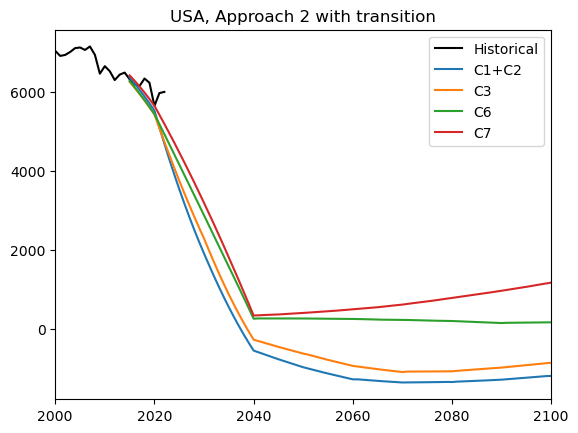

In [118]:
plt.plot(allocator.xr_dataread.Time,
         allocator.xr_dataread.GHG_hist_excl.sel(Region='USA'), c='black', label='Historical')
for c in np.array(allocator.xr_combs.Category):
    plt.plot(allocator.xr_combs.Time,
             allocator.xr_combs.sel(Region='USA', Discount_factor=0, Historical_startyear=1990, Scenario='SSP2', Convergence_year=2040).Approach2t.sel(Category=c),
             label=c)
plt.legend()
plt.title("USA, Approach 2 with transition")
plt.xlim([2000, 2100])

(2000.0, 2100.0)

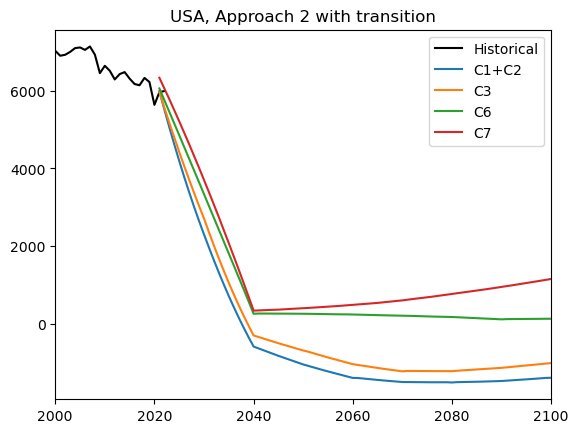

In [114]:
plt.plot(allocator.xr_dataread.Time,
         allocator.xr_dataread.GHG_hist_excl.sel(Region='USA'), c='black', label='Historical')
for c in np.array(allocator.xr_combs.Category):
    plt.plot(allocator.xr_combs.Time,
             allocator.xr_combs.sel(Region='USA', Discount_factor=0, Historical_startyear=1990, Scenario='SSP2', Convergence_year=2040).Approach2t.sel(Category=c),
             label=c)
plt.legend()
plt.title("USA, Approach 2 with transition")
plt.xlim([2000, 2100])

ValueError: x and y must have same first dimension, but have shapes (251,) and (1, 251)

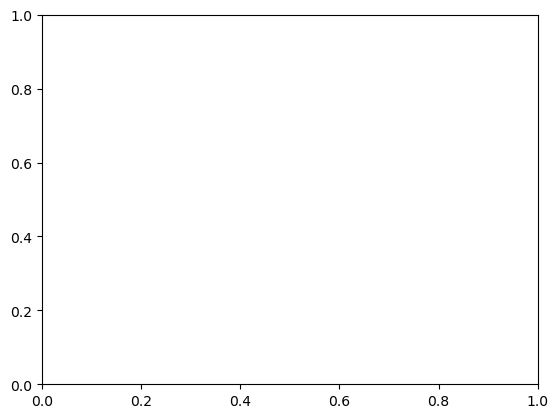

In [100]:
for c in allocator.xr_combs.Category:
    plt.plot(allocator.xr_combs.Time,
             allocator.xr_combs.sel(Region='IND', Discount_factor=0, Historical_startyear=1990, Scenario='SSP2').Approach2t.sel(Category=c))

Temperature NDC-alignment metric

In [3]:
import class_tempalign
reload(class_tempalign)
from class_tempalign import tempaligning

tempaligner = tempaligning() # FIRST RUN AGGREGATOR FOR THIS!! (2030 alloc)
tempaligner.get_relation_2030emis_temp()
tempaligner.determine_tempoutcomes()
tempaligner.save()

# ==================================== #
# Initializing tempaligning class        #
# ==================================== #
- Determine relation between 2030-emissions and temperature outcome
- Determine temperature metric


100%|██████████| 6/6 [00:11<00:00,  1.96s/it]


- Save


Reading policy scenarios from ENGAGE

In [3]:
import class_policyscens
reload(class_policyscens)
from class_policyscens import policyscenadding

policyscenner = policyscenadding()
policyscenner.read_engage_data()
policyscenner.filter_and_convert()
policyscenner.add_to_xr()

# ==================================== #
# Initializing policyscenadding class  #
# ==================================== #
- Read ENGAGE scenarios and change region namings
- Filter correct scenarios and convert to xarray object
- Add to overall xrobject


Variance decomposition

In [8]:
import class_variancedecomp
reload(class_variancedecomp)
from class_variancedecomp import vardecomposing

vardecomposer = vardecomposing(startyear=2021, gas='GHG', lulucf='incl')
vardecomposer.sobolindices = {}
print('- Starting sobols for fixed years, over many countries')
timeseries = np.arange(2025, 2101, 1)
for year in timeseries:
    print('  Starting with', year)
    xr_cty, ar_time, array_dims, array_inputs, problem, samples = vardecomposer.prepare_global_sobol(year)
    vardecomposer.sobolindices[year] = vardecomposer.apply_decomposition(xr_cty, ar_time, array_dims, array_inputs, problem, samples)
vardecomposer.save(array_dims, timeseries)

# ==================================== #
# Initializing vardecomposing class    #
# ==================================== #
- Starting sobols for fixed years, over many countries
  Starting with 2025


207it [03:02,  1.13it/s]


  Starting with 2026


207it [02:56,  1.17it/s]


  Starting with 2027


207it [03:09,  1.09it/s]


  Starting with 2028


207it [02:53,  1.19it/s]


  Starting with 2029


207it [02:58,  1.16it/s]


  Starting with 2030


207it [03:47,  1.10s/it]


  Starting with 2031


207it [03:54,  1.13s/it]


  Starting with 2032


207it [03:09,  1.09it/s]


  Starting with 2033


207it [02:35,  1.33it/s]


  Starting with 2034


207it [02:34,  1.34it/s]


  Starting with 2035


207it [02:30,  1.38it/s]


  Starting with 2036


207it [02:32,  1.36it/s]


  Starting with 2037


207it [02:30,  1.37it/s]


  Starting with 2038


207it [02:31,  1.37it/s]


  Starting with 2039


207it [02:25,  1.42it/s]


  Starting with 2040


207it [03:19,  1.04it/s]


  Starting with 2041


207it [02:29,  1.39it/s]


  Starting with 2042


207it [02:31,  1.37it/s]


  Starting with 2043


207it [02:26,  1.41it/s]


  Starting with 2044


207it [02:47,  1.24it/s]


  Starting with 2045


207it [02:25,  1.42it/s]


  Starting with 2046


207it [02:33,  1.35it/s]


  Starting with 2047


207it [02:31,  1.37it/s]


  Starting with 2048


207it [02:33,  1.34it/s]


  Starting with 2049


207it [02:25,  1.42it/s]


  Starting with 2050


207it [02:30,  1.37it/s]


  Starting with 2051


207it [02:25,  1.42it/s]


  Starting with 2052


207it [02:30,  1.37it/s]


  Starting with 2053


207it [02:23,  1.44it/s]


  Starting with 2054


207it [02:30,  1.38it/s]


  Starting with 2055


207it [02:24,  1.44it/s]


  Starting with 2056


207it [02:30,  1.38it/s]


  Starting with 2057


207it [02:25,  1.42it/s]


  Starting with 2058


207it [02:30,  1.37it/s]


  Starting with 2059


207it [02:24,  1.43it/s]


  Starting with 2060


207it [02:33,  1.35it/s]


  Starting with 2061


207it [02:24,  1.43it/s]


  Starting with 2062


207it [02:30,  1.38it/s]


  Starting with 2063


207it [02:24,  1.43it/s]


  Starting with 2064


207it [02:29,  1.39it/s]


  Starting with 2065


207it [02:23,  1.44it/s]


  Starting with 2066


207it [02:28,  1.39it/s]


  Starting with 2067


207it [02:23,  1.44it/s]


  Starting with 2068


207it [02:27,  1.41it/s]


  Starting with 2069


207it [02:22,  1.45it/s]


  Starting with 2070


207it [02:28,  1.39it/s]


  Starting with 2071


207it [02:27,  1.41it/s]


  Starting with 2072


207it [02:39,  1.30it/s]


  Starting with 2073


207it [02:28,  1.39it/s]


  Starting with 2074


207it [02:28,  1.39it/s]


  Starting with 2075


207it [02:29,  1.39it/s]


  Starting with 2076


207it [02:29,  1.39it/s]


  Starting with 2077


207it [02:27,  1.40it/s]


  Starting with 2078


207it [02:28,  1.39it/s]


  Starting with 2079


207it [02:30,  1.38it/s]


  Starting with 2080


207it [02:28,  1.39it/s]


  Starting with 2081


207it [02:28,  1.39it/s]


  Starting with 2082


207it [02:30,  1.38it/s]


  Starting with 2083


207it [02:27,  1.40it/s]


  Starting with 2084


207it [02:33,  1.35it/s]


  Starting with 2085


207it [02:26,  1.41it/s]


  Starting with 2086


207it [02:26,  1.41it/s]


  Starting with 2087


207it [02:26,  1.41it/s]


  Starting with 2088


207it [02:25,  1.42it/s]


  Starting with 2089


207it [02:25,  1.42it/s]


  Starting with 2090


207it [02:24,  1.43it/s]


  Starting with 2091


207it [02:25,  1.42it/s]


  Starting with 2092


207it [02:24,  1.43it/s]


  Starting with 2093


207it [02:29,  1.38it/s]


  Starting with 2094


207it [02:24,  1.43it/s]


  Starting with 2095


207it [02:29,  1.39it/s]


  Starting with 2096


207it [02:28,  1.39it/s]


  Starting with 2097


207it [02:27,  1.41it/s]


  Starting with 2098


207it [02:27,  1.41it/s]


  Starting with 2099


207it [02:28,  1.39it/s]


  Starting with 2100


207it [02:27,  1.41it/s]


- Save global results


PermissionError: [Errno 13] Permission denied: 'K:\\Data\\Data_effortsharing\\DataUpdate_ongoing\\startyear_2021\\xr_sobol_GHG_incl.nc'

In [9]:
vardecomposer.save(array_dims, timeseries)

- Save global results
